In [1]:
import pandas as pd
#import pandas_profiling
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("Datasets/ds_clean.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28549 entries, 0 to 28548
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   publisher       23646 non-null  object 
 1   genres          28549 non-null  object 
 2   app_name        28548 non-null  object 
 3   title           28548 non-null  object 
 4   url             28549 non-null  object 
 5   release_date    28549 non-null  object 
 6   tags            28525 non-null  object 
 7   discount_price  204 non-null    float64
 8   reviews_url     28548 non-null  object 
 9   specs           28263 non-null  object 
 10  price           27579 non-null  object 
 11  early_access    28549 non-null  bool   
 12  id              28548 non-null  float64
 13  developer       28379 non-null  object 
 14  sentiment       28549 non-null  object 
 15  metascore       28549 non-null  int64  
 16  release_year    28549 non-null  int64  
dtypes: bool(1), float64(2), int64(2

# 1° Valores faltantes
Dependera de los valores: <br>
Si son pocos valores se eliminaran si son muchos valores se imputaran 
- si son numericos imputara con el valor de la media <br>
- Si son categoricas se imputa con la moda

Se imputara valores ya que nos quedaremos con un dataset con pocos datos

Con la media la relacion descuento y el presio da una grafica sin sentido<br>
tambien se quiso reemplazar con una distribucion t student tambien la relacion presio descuento me dio cualquiercosa <br>
nos dimos cuenta que la relacion debe ser lineal porlo que usaremos la imputacion lneal

# 2° Valores atipicos
Dependera de los valores: <br>
- si son numericos imputamos elimnamos las filas con la regla de 3 sigma <br>


Eliminamos todos los nan ya que sino la modificara nuestra  media si hay muchos valores nan y asignamos 0 por ejemplo

### Se estudia el PRICE

In [4]:
print('cantidad de nulos: ',df['price'].isnull().sum())
print('tipo de dato: ',df['price'].dtype)
print('cantidad datos',df.shape)
df['price'].iloc[0]

cantidad de nulos:  970
tipo de dato:  object
cantidad datos (28549, 17)


'4.99'

In [5]:
# Eliminamos los datos ya que son pocos y no afectan
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df = df.dropna(subset = ['price'])

In [6]:
print('cantidad de nulos: ',df['price'].isnull().sum())
print('tipo de dato: ',df['price'].dtype)
print('cantidad datos',df.shape)
df['price'].iloc[0]

cantidad de nulos:  0
tipo de dato:  float64
cantidad datos (26046, 17)


4.99

### Se estudia el DISCOUNT_PRICE

- 1° Valores faltantes

In [7]:
print('cantidad de nulos: ',df['discount_price'].isnull().sum())
print('tipo de dato: ',df['discount_price'].dtype)
print('cantidad datos',df.shape)
df['discount_price'].iloc[0]

cantidad de nulos:  25907
tipo de dato:  float64
cantidad datos (26046, 17)


4.49

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Dividir el DataFrame en dos partes: con valores faltantes y sin valores faltantes
df_missing = df[df['discount_price'].isnull()]
df_not_missing = df[~df['discount_price'].isnull()]

# Dividir el DataFrame sin valores faltantes en características (X) y variable objetivo (y)
X = df_not_missing[['price']]
y = df_not_missing['discount_price']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y ajustar un modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir los valores faltantes utilizando el modelo
imputed_values = model.predict(df_missing[['price']])

# Llenar los valores faltantes con las predicciones del modelo
df.loc[df['discount_price'].isnull(), 'discount_price'] = imputed_values



In [9]:
print('cantidad de nulos: ',df['discount_price'].isnull().sum())
print('tipo de dato: ',df['discount_price'].dtype)
print('cantidad datos',df.shape)
df['discount_price'].iloc[0]

cantidad de nulos:  0
tipo de dato:  float64
cantidad datos (26046, 17)


4.49

- Scater  (verificacion datos relacionados)

[Text(0.5, 0, 'price'), Text(0, 0.5, 'points')]

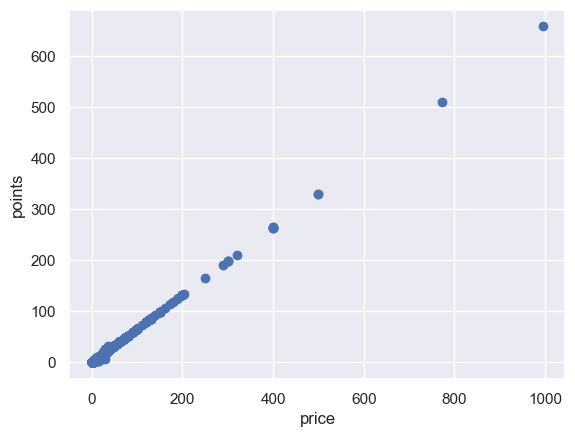

In [10]:
fig = plt.figure()
ax = plt.axes()

ax.scatter(df.price, df.discount_price)
ax.set(xlabel='price', ylabel='points')

- 2° Valores atipicos

a) BOXPLOT-HISTOGRAMA

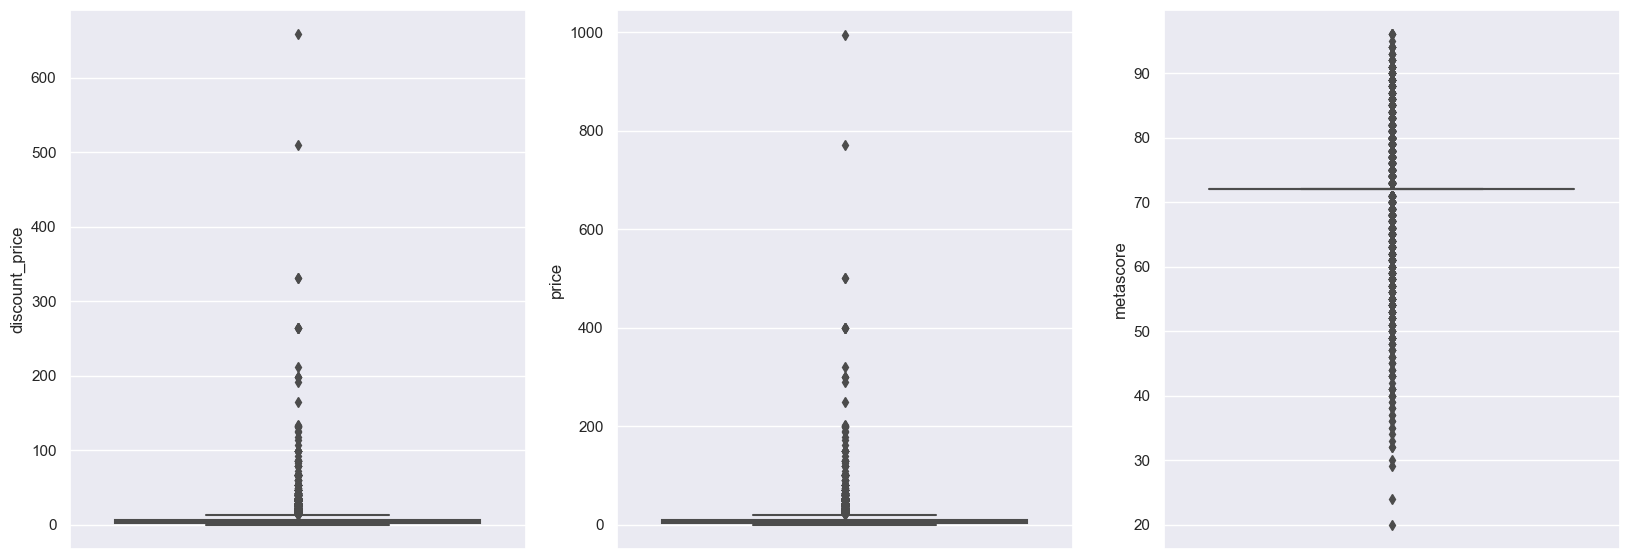

In [11]:
fig=plt.figure(figsize=(20,7))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)


sns.boxplot(data=df,y='discount_price',ax=ax1);
sns.boxplot(data=df,y='price',ax=ax2);
sns.boxplot(data=df,y='metascore',ax=ax3);



array([[<Axes: title={'center': 'discount_price'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'metascore'}>],
       [<Axes: title={'center': 'release_year'}>, <Axes: >]], dtype=object)

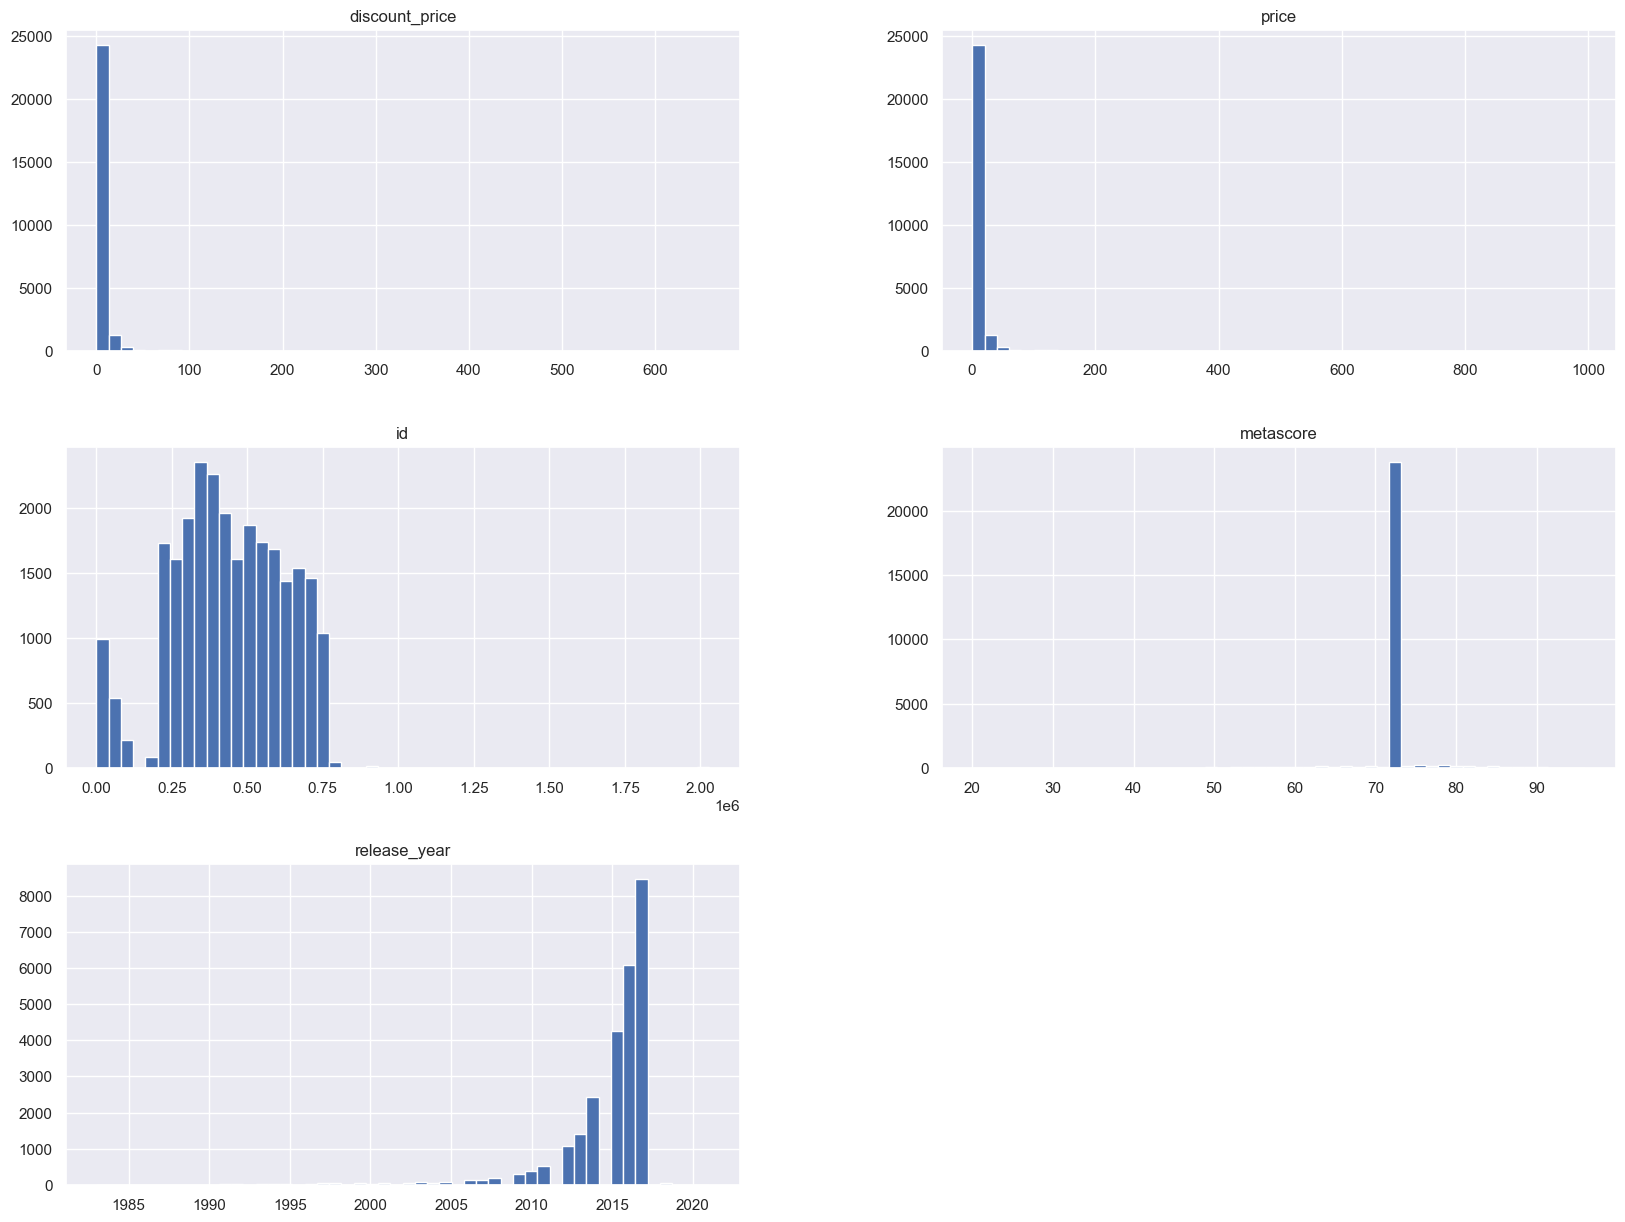

In [12]:
df.hist(bins = 50, figsize= (20,15))

C:\Users\rodrigo\AppData\Local\Temp\ipykernel_26396\631002909.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['discount_price'], hist=True, kde=True, rug=True)


<Axes: xlabel='discount_price', ylabel='Density'>

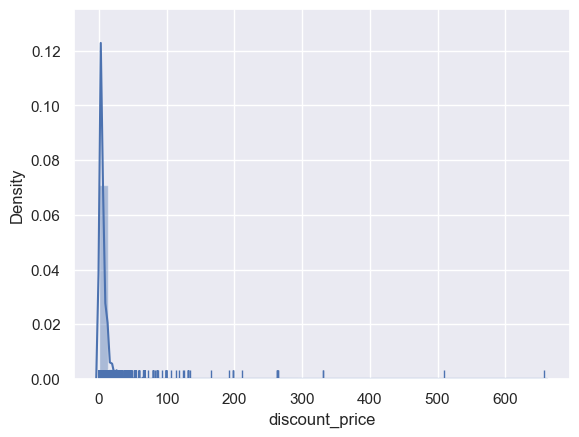

In [13]:
sns.distplot(df['discount_price'], hist=True, kde=True, rug=True)

C:\Users\rodrigo\AppData\Local\Temp\ipykernel_26396\1995882310.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], hist=True, kde=True, rug=True)


<Axes: xlabel='price', ylabel='Density'>

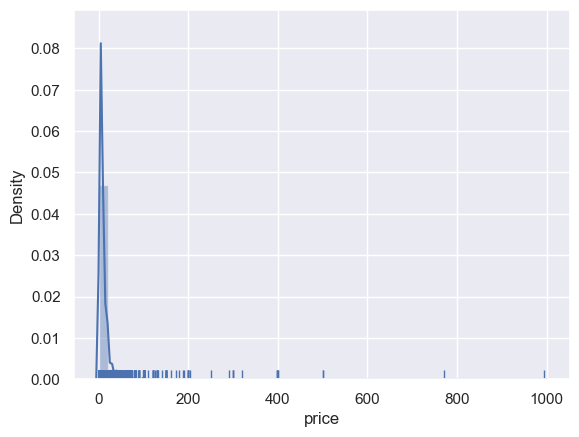

In [14]:
sns.distplot(df['price'], hist=True, kde=True, rug=True)

Boxplot: <br>
discount_price: me da pocos outlayes<br>
price: outlayers muy altos lo qeu hace pensar que hay precios de juegos de muy distinta calidad<br>
<br>
histograma:<br>
se observa que no tienen una distribucion normal ademas que tener mucha dispercion

b) Calculos de IQR y media(se puede hallar con describe)

-- discount_price

In [15]:
q1_discount_price = df['discount_price'].quantile(0.25)
q3_discount_price = df['discount_price'].quantile(0.75)
iqr_discount_price = q3_discount_price - q1_discount_price

mediana_discount_price = df['discount_price'].median()

print('la media de discount_price es:',mediana_discount_price,'IQR(donde esta el 50% datos):',iqr_discount_price )

la media de discount_price es: 3.0521528195936205 IQR(donde esta el 50% datos): 4.629104969822576


Se observan 3 outlayer que podemos eliminar de ser necesario

-- price

In [16]:
q1_price = df['price'].quantile(0.25)
q3_price = df['price'].quantile(0.75)
iqr_price = q3_price - q1_price

mediana_price = df['price'].median()

print('la media de price es:',mediana_price,'IQR(donde esta el 50% datos):',iqr_price )

la media de price es: 4.99 IQR(donde esta el 50% datos): 7.0


In [17]:
df.describe(include=[np.number])

,discount_price,price,id,metascore,release_year
count,26046.000000,26046.000000,2.604500e+04,26046.000000,26046.000000
mean,6.049801,9.522428,4.381127e+05,72.020694,2014.821086
std,10.749538,16.253254,1.863569e+05,3.304673,3.315509
min,0.076300,0.490000,1.000000e+01,20.000000,1983.000000
25%,1.729551,2.990000,3.133750e+05,72.000000,2014.000000
50%,3.052153,4.990000,4.341300e+05,72.000000,2016.000000
75%,6.358656,9.990000,5.851600e+05,72.000000,2017.000000
max,657.746469,995.000000,2.028850e+06,96.000000,2021.000000


discount_price: tenemos unos precios de media 4.19 pero co ua dispersion de 75%-25%=21, hay mucha variacion de productos<br>
price: tenemos una media de  casi 5 con el 50% de los datos con dispersion de 75%-25%=7 puntos, hay varios juegos que se salen de ese rango

Se observa que mientras mas sea el valor del juego generalmente tendra mejores descuentos, ademas se puede ver que un juego cuesta como 1000 usd pensamos que es un outlayer

### SOLUCION DATOS ATIPICOS

--price

In [18]:
df.shape

(26046, 17)

In [19]:
# Calcular la media y la desviación estándar
media = df['discount_price'].mean()
desviacion_std = df['discount_price'].std()

# Definir límites basados en la regla de 3 sigma
limite_inferior = media - 3 * desviacion_std
limite_superior = media + 3 * desviacion_std

print('inferior',limite_inferior,'superior',limite_superior)


inferior -26.198812918188555 superior 38.298414122799976


In [20]:
# Filtrar el DataFrame
df = df[(df['discount_price'] >= limite_inferior) & (df['discount_price'] <= limite_superior)]

In [21]:
df.shape

(25768, 17)

--discount_price

In [22]:
# Calcular la media y la desviación estándar
media = df['price'].mean()
desviacion_std = df['price'].std()

# Definir límites basados en la regla de 3 sigma
limite_inferior = media - 3 * desviacion_std
limite_superior = media + 3 * desviacion_std

print('inferior',limite_inferior,'superior',limite_superior)

inferior -16.325043453266733 superior 33.31559685283209


In [23]:
# Filtrar el DataFrame
df = df[(df['price'] >= limite_inferior) & (df['price'] <= limite_superior)]

In [24]:
df.shape

(25175, 17)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25175 entries, 0 to 28548
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   publisher       20738 non-null  object 
 1   genres          25175 non-null  object 
 2   app_name        25175 non-null  object 
 3   title           25175 non-null  object 
 4   url             25175 non-null  object 
 5   release_date    25175 non-null  object 
 6   tags            25163 non-null  object 
 7   discount_price  25175 non-null  float64
 8   reviews_url     25174 non-null  object 
 9   specs           25023 non-null  object 
 10  price           25175 non-null  float64
 11  early_access    25175 non-null  bool   
 12  id              25174 non-null  float64
 13  developer       25026 non-null  object 
 14  sentiment       25175 non-null  object 
 15  metascore       25175 non-null  int64  
 16  release_year    25175 non-null  int64  
dtypes: bool(1), float64(3), int64(2), ob

In [26]:
df.to_csv('Datasets/ds_clean.csv', index=False)

# MACHINE LEARNING
## Sistema de PREDICCION

In [27]:
# Caraterísticas de las variables numéricas categóricas
df.describe(include=object)

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,developer,sentiment
count,20738,25175,25175,25175,25175,25175,25163,25174,25023,25026,25175
unique,7271,697,25157,25157,25175,3154,11732,25174,3093,9889,19
top,Ubisoft,['Action'],Soundtrack,Soundtrack,http://store.steampowered.com/app/761140/Lost_...,2012-10-16,"['Casual', 'Simulation']",http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],Ubisoft - San Francisco,SinDato
freq,356,1704,3,3,1,100,1286,1,2509,1257,5471


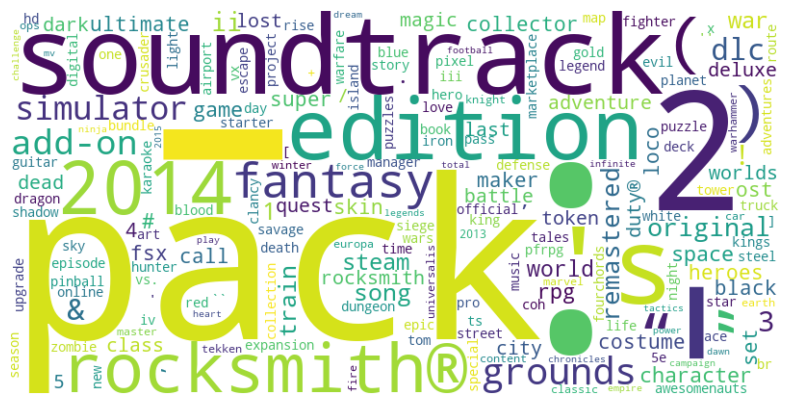

In [28]:
import nltk#
from wordcloud import WordCloud #
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#### GENERAMOS UNA NUBE DE LAS PALABRAS MAS FRECUENTES EN LA COLUMNA 'title'

def generate_wordcloud(texts):
    # Get English prepositions
    stop_words = set(stopwords.words('english'))

    # Combine all the texts into a single string
    combined_text = ' '.join(str(text) for text in texts)

    # Tokenize the combined text into words
    words = word_tokenize(combined_text)

    # Filter out the prepositions
    filtered_words = [word.lower() for word in words if word.lower() not in stop_words]

    # Create a frequency distribution of the words
    freq_dist = nltk.FreqDist(filtered_words)

    # Create the word cloud with word frequencies as input
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Combine all the text from the 'title' column into a single list
all_text = df['app_name'].tolist()

# Apply the function to the combined text
generate_wordcloud(all_text)

Como se ve tanto en el describe que el mas repetido es sountrack con la cantidad de repeticiones =3, se corobora con la nube d e palabras.

# 5° Seleccion y reduccion de dimencionalidad

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25175 entries, 0 to 28548
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   publisher       20738 non-null  object 
 1   genres          25175 non-null  object 
 2   app_name        25175 non-null  object 
 3   title           25175 non-null  object 
 4   url             25175 non-null  object 
 5   release_date    25175 non-null  object 
 6   tags            25163 non-null  object 
 7   discount_price  25175 non-null  float64
 8   reviews_url     25174 non-null  object 
 9   specs           25023 non-null  object 
 10  price           25175 non-null  float64
 11  early_access    25175 non-null  bool   
 12  id              25174 non-null  float64
 13  developer       25026 non-null  object 
 14  sentiment       25175 non-null  object 
 15  metascore       25175 non-null  int64  
 16  release_year    25175 non-null  int64  
dtypes: bool(1), float64(3), int64(2), ob

## a) *Reduccion por el tipo de informacion que aporta*

In [30]:
df = df.drop('publisher', axis = 1) 
df = df.drop('title', axis = 1) # lo mismo que en app_name
df = df.drop('url', axis = 1)
df = df.drop('sentiment', axis = 1)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25175 entries, 0 to 28548
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   genres          25175 non-null  object 
 1   app_name        25175 non-null  object 
 2   release_date    25175 non-null  object 
 3   tags            25163 non-null  object 
 4   discount_price  25175 non-null  float64
 5   reviews_url     25174 non-null  object 
 6   specs           25023 non-null  object 
 7   price           25175 non-null  float64
 8   early_access    25175 non-null  bool   
 9   id              25174 non-null  float64
 10  developer       25026 non-null  object 
 11  metascore       25175 non-null  int64  
 12  release_year    25175 non-null  int64  
dtypes: bool(1), float64(3), int64(2), object(7)
memory usage: 2.5+ MB


## b) *Reduccion por el ratio de valores perdidos*

In [32]:
def filtrar_columnas_nulas(df):
    umbral_proporcion = 0.02
    num_filas = len(df)
    columnas_filtradas = []

    for columna in df.columns:
        if df[columna].isnull().sum() == 0:  # Las columnas que no tienen nulos se mantienen
            continue
        else:
            num_nulos = df[columna].isnull().sum()  # Se cuenta el número de nulos en la columna
            proporcion_nulos = num_nulos / num_filas

            if proporcion_nulos < umbral_proporcion:
                columnas_filtradas.append(columna)

    df.drop(columns=columnas_filtradas, inplace=True)  # Eliminar las columnas del dataframe

    print('Se filtraron las siguientes columnas:', columnas_filtradas)

    return df  # Retorna el dataframe actualizado

In [33]:
df = filtrar_columnas_nulas(df)

Se filtraron las siguientes columnas: ['tags', 'reviews_url', 'specs', 'id', 'developer']


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25175 entries, 0 to 28548
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   genres          25175 non-null  object 
 1   app_name        25175 non-null  object 
 2   release_date    25175 non-null  object 
 3   discount_price  25175 non-null  float64
 4   price           25175 non-null  float64
 5   early_access    25175 non-null  bool   
 6   metascore       25175 non-null  int64  
 7   release_year    25175 non-null  int64  
dtypes: bool(1), float64(2), int64(2), object(3)
memory usage: 1.6+ MB


In [35]:
# Medidas de Tendencia central de variables numéricas
df.describe(include=[np.number])

,discount_price,price,metascore,release_year
count,25175.000000,25175.000000,25175.000000,25175.000000
mean,4.841641,7.695982,71.997061,2014.792969
std,4.263568,6.444869,3.273914,3.354904
min,0.076300,0.490000,20.000000,1983.000000
25%,1.729551,2.990000,72.000000,2014.000000
50%,3.052153,4.990000,72.000000,2016.000000
75%,6.358656,9.990000,72.000000,2017.000000
max,25.490000,32.990000,96.000000,2021.000000


In [36]:
# Caraterísticas de las variables numéricas categóricas
df.describe(include=object)

,genres,app_name,release_date
count,25175,25175,25175
unique,697,25157,3154
top,['Action'],Soundtrack,2012-10-16
freq,1704,3,100


## c) *Reduccion por alta correlacion* (Vertical)

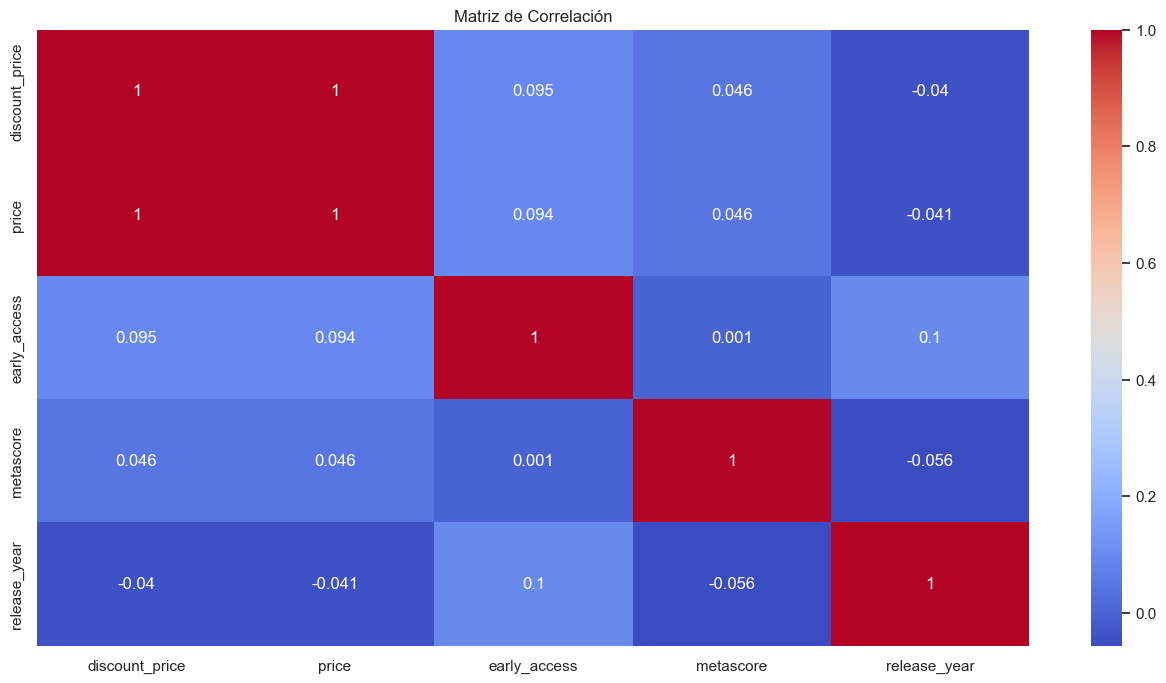

In [37]:
#df = df.drop('id', axis = 1)
data_num= df.select_dtypes(exclude = ['object'])
data_num.head(2)

correlation_matrix = data_num.corr()

plt.figure(figsize=(16,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [38]:
# Eliminación por el criterio B descrito lineas arriba 
df = df.drop('discount_price', axis = 1)
df = df.drop('release_date', axis = 1)
df = df.drop('early_access', axis = 1)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25175 entries, 0 to 28548
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        25175 non-null  object 
 1   app_name      25175 non-null  object 
 2   price         25175 non-null  float64
 3   metascore     25175 non-null  int64  
 4   release_year  25175 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ MB


## d) Repetidos (Reduccion horizontal) 

In [40]:
# Contar la frecuencia de cada película en la columna 'app_name'
peliculas_repetidas = df['app_name'].value_counts()

# Filtrar las películas que se repiten
peliculas_repetidas = peliculas_repetidas[peliculas_repetidas > 1]

# Obtener el número de películas repetidas
num_peliculas_repetidas = len(peliculas_repetidas)

print("Número de películas que se repiten:", num_peliculas_repetidas)

Número de películas que se repiten: 17


In [41]:
# Se borran los duplicados y se mantienen las primeras apariciones
df.drop_duplicates(subset='app_name', keep='first', inplace=True)


In [42]:
# Verificar si hay películas repetidas
hay_repetidas = df['app_name'].duplicated().any()

if hay_repetidas:
    print("Hay películas repetidas en el dataframe.")
else:
    print("No hay películas repetidas en el dataframe.")

No hay películas repetidas en el dataframe.


## e) *Reduccion por baja varianza*

In [43]:
# Calcular la varianza de las columnas numéricas
numeric_columns = df.select_dtypes(include=[float, int]).columns
variances = df[numeric_columns].var()

# Establecer un umbral para la varianza (puedes ajustar este valor según tus necesidades)
umbral_varianza = 1e-3

# Filtrar las columnas con baja varianza
columnas_baja_varianza = variances[variances <= umbral_varianza].index

# Crear un nuevo DataFrame con las columnas de baja varianza
df_baja_varianza = df[columnas_baja_varianza]

print(df_baja_varianza)

Empty DataFrame
Columns: []
Index: [0, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, ...]

[25157 rows x 0 columns]


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25157 entries, 0 to 28548
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        25157 non-null  object 
 1   app_name      25157 non-null  object 
 2   price         25157 non-null  float64
 3   metascore     25157 non-null  int64  
 4   release_year  25157 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ MB


## *Reduccion por PCA*

In [45]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

numeric_columns = df.select_dtypes(include=[float, int]).columns
df_numeric = df[numeric_columns]

# Estandarizar los datos (importante para PCA)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_numeric)

# Aplicar PCA
n_components = 2  # Número de componentes principales deseados
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(data_scaled)

# Crear un nuevo DataFrame con los componentes principales
columns_pca = [f'PC{i+1}' for i in range(n_components)]
df_pca = pd.DataFrame(data=pca_result, columns=columns_pca)

print(df_pca)

            PC1       PC2
0      0.785726  0.136922
1      0.945921 -0.527021
2      0.869433  0.008681
3      0.367191  0.778124
4     -0.386173  1.932288
...         ...       ...
25152  1.036847 -0.247800
25153  1.036847 -0.247800
25154  0.785726  0.136922
25155  1.036847 -0.247800
25156  0.611093 -0.014059

[25157 rows x 2 columns]


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25157 entries, 0 to 28548
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        25157 non-null  object 
 1   app_name      25157 non-null  object 
 2   price         25157 non-null  float64
 3   metascore     25157 non-null  int64  
 4   release_year  25157 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ MB


In [47]:
df.genres.iloc[0]

"['Action', 'Casual', 'Indie', 'Simulation', 'Strategy']"

In [48]:
import ast
df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else np.nan)

In [49]:
df.genres.iloc[0]

['Action', 'Casual', 'Indie', 'Simulation', 'Strategy']

In [50]:
print(df.shape)
df

(25157, 5)


,genres,app_name,price,metascore,release_year
0,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,4.99,72,2018
3,"[Action, Adventure, Casual]",弹炸人2222,0.99,72,2017
4,"[Action, Adventure, Simulation]",Battle Royale Trainer,3.99,72,2018
5,"[Free to Play, Indie, Simulation, Sports]",SNOW - All Access Basic Pass,9.99,72,2018
6,"[Free to Play, Indie, Simulation, Sports]",SNOW - All Access Pro Pass,18.99,72,2018
...,...,...,...,...,...
28544,"[Action, Adventure, Casual, Indie]",Kebab it Up!,1.99,72,2018
28545,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,1.99,72,2018
28546,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,4.99,72,2018
28547,"[Indie, Racing, Simulation]",Russian Roads,1.99,72,2018


In [51]:
df.to_csv('Datasets/data_reducida.csv', index=False)

In [52]:
df = pd.read_csv("Datasets/data_reducida.csv")

In [53]:
df.genres.iloc[0]

"['Action', 'Casual', 'Indie', 'Simulation', 'Strategy']"

In [54]:
import numpy as np
df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else np.nan)

In [55]:
df['genres']= df['genres'].apply(lambda x:x[0] )

In [56]:
print(df.shape)
df.head(10)

(25157, 5)


,genres,app_name,price,metascore,release_year
0,Action,Lost Summoner Kitty,4.99,72,2018
1,Action,弹炸人2222,0.99,72,2017
2,Action,Battle Royale Trainer,3.99,72,2018
3,Free to Play,SNOW - All Access Basic Pass,9.99,72,2018
4,Free to Play,SNOW - All Access Pro Pass,18.99,72,2018
5,Free to Play,SNOW - All Access Legend Pass,29.99,72,2018
6,Action,Army of Tentacles: (Not) A Cthulhu Dating Sim:...,10.99,72,2018
7,Casual,Beach Rules,3.99,72,2018
8,Casual,Planetarium 2 - Zen Odyssey,2.99,72,2018
9,Adventure,The first thrust of God,1.59,72,2018


*Reindexamos ya que teniamos problemas*

In [57]:
#df.reset_index(drop=True, inplace=True)

In [58]:
# Utiliza el método .head() para seleccionar los primeros 1000 datos
df2 = df.head(2515)

In [59]:
print(df.shape)
df.head(10)

(25157, 5)


,genres,app_name,price,metascore,release_year
0,Action,Lost Summoner Kitty,4.99,72,2018
1,Action,弹炸人2222,0.99,72,2017
2,Action,Battle Royale Trainer,3.99,72,2018
3,Free to Play,SNOW - All Access Basic Pass,9.99,72,2018
4,Free to Play,SNOW - All Access Pro Pass,18.99,72,2018
5,Free to Play,SNOW - All Access Legend Pass,29.99,72,2018
6,Action,Army of Tentacles: (Not) A Cthulhu Dating Sim:...,10.99,72,2018
7,Casual,Beach Rules,3.99,72,2018
8,Casual,Planetarium 2 - Zen Odyssey,2.99,72,2018
9,Adventure,The first thrust of God,1.59,72,2018


In [60]:
df2.shape

(2515, 5)

# Sistema de prediccion

In [71]:
import pandas as pd
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from mlxtend.regressor import StackingRegressor
from sklearn.preprocessing import OneHotEncoder

# Generar una nube de palabras y extraer características
def extract_word_features(texts):
    stop_words = set(stopwords.words('english'))
    combined_text = ' '.join(str(text) for text in texts)
    words = word_tokenize(combined_text)
    filtered_words = [word.lower() for word in words if word.lower() not in stop_words]
    freq_dist = nltk.FreqDist(filtered_words)
    
    # Devuelve la frecuencia de palabras clave relevantes
    return freq_dist['keyword1'], freq_dist['keyword2'], ...

# Datos de ejemplo
data = {
    "genres": ["Accion", "Aventura", "Accion", "Aventura"],
    "release_year": [2020, 2018, 2019, 2021],
    "metascore": [80, 70, 85, 90],
    "price": [29.99, 39.99, 24.99, 49.99],
    "app_name": ["Game 1", "Game 2", "Game 3", "Game 4"]  # Agregar nombres de juegos
}


# Dividir datos en características (X) y objetivo (y)
X = df2[["genres", "release_year", "metascore"]]
y = df2["price"]

# Obtener las características de las nubes de palabras para los nombres de los juegos
word_features = extract_word_features(df2['app_name'])

# Agregar las características al DataFrame
df2['keyword1_freq'] = word_features[0]
df2['keyword2_freq'] = word_features[1]
...

# Codificar variables categóricas usando One-Hot Encoding
encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(X[["genres"]])

# Combinar características numéricas y codificadas
X_final = pd.concat([X[["release_year", "metascore"]], pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(["genres"]))], axis=1)

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Crear modelos base
model_rf = RandomForestRegressor(random_state=42)
model_gb = GradientBoostingRegressor(random_state=42)
model_lr = LinearRegression()

# Crear ensamble con stacking
stacking_regressor = StackingRegressor(regressors=[model_rf, model_gb, model_lr], meta_regressor=LinearRegression())

# Crear pipeline
pipeline = Pipeline(steps=[("stacking", stacking_regressor)])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Realizar predicción para los valores dados
input_data = {
    "genres": ["Action"],
    "release_year": [2022],
    "metascore": [88],
    "app_name": ["New Game"]  # Agregar el nombre del nuevo juego
}

input_df = pd.DataFrame(input_data)
word_features_input = extract_word_features(input_df['app_name'])
input_df['keyword1_freq'] = word_features_input[0]
input_df['keyword2_freq'] = word_features_input[1]
...

input_encoded = encoder.transform(input_df[["genres"]])
input_final = pd.concat([input_df[["release_year", "metascore"]], pd.DataFrame(input_encoded, columns=encoder.get_feature_names_out(["genres"]))], axis=1)

predicted_price = pipeline.predict(input_final)[0]

# Calcular RMSE para las predicciones de prueba
predictions = pipeline.predict(X_test)
rmse = mean_squared_error(y_test, predictions, squared=False)

print("Precio Predicho:", predicted_price)
print("RMSE en el Conjunto de Prueba:", rmse)



C:\Users\rodrigo\AppData\Local\Temp\ipykernel_26396\3792156481.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['keyword1_freq'] = word_features[0]
C:\Users\rodrigo\AppData\Local\Temp\ipykernel_26396\3792156481.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['keyword2_freq'] = word_features[1]
c:\Users\rodrigo\.conda\envs\steam_v1\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `spars

Precio Predicho: 17.599938717352074
RMSE en el Conjunto de Prueba: 5.86880582538105


c:\Users\rodrigo\.conda\envs\steam_v1\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
c:\Users\rodrigo\.conda\envs\steam_v1\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
c:\Users\rodrigo\.conda\envs\steam_v1\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
c:\Users\rodrigo\.conda\envs\steam_v1\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
c:\Users\rodrigo\.conda\envs\steam_v1\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
c:\Users\rodrigo\.conda\envs\steam_v1\Lib\site-packages\sklear

In [62]:
# GUARDAR el modelo
import joblib
modelo_filename = 'modelo_regresion.pkl'
joblib.dump(pipeline, modelo_filename)

['modelo_regresion.pkl']

In [65]:
import joblib

# Cargar el modelo desde el archivo
modelo_filename = 'modelo_regresion.pkl'  # Reemplaza con el nombre real de tu archivo
loaded_model = joblib.load(modelo_filename)

In [70]:
loaded_model.predict(X_train)
rmse = mean_squared_error(y_test, predictions, squared=False)
rmse

c:\Users\rodrigo\.conda\envs\steam_v1\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
c:\Users\rodrigo\.conda\envs\steam_v1\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
c:\Users\rodrigo\.conda\envs\steam_v1\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


5.86880582538105